<a href="https://colab.research.google.com/github/Atom1010/PSO-Algorithm/blob/main/PSOalogrithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal solution: [2.8261173522609495e-05, 8.154713862408997e-05]
Objective function value: 1.47774917991228e-06


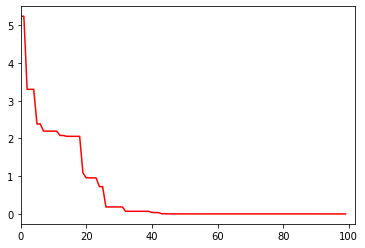

In [7]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
# TO CUSTOMIZE THIS PSO CODE TO SOLVE UNCONSTRAINED OPTIMIZATION PROBLEMS, CHANGE THE PARAMETERS IN THIS SECTION ONLY:
# THE FOLLOWING PARAMETERS MUST BE CHANGED.
def objective_function(X):
    A = 10
    y = A*2 + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])
    return y
  
bounds = [(-5.12, 5.12), (-5.12, 5.12)]  # upper and lower bounds of variables
nv = 2  # number of variables
mm = -1  # if minimization problem, mm = -1; if maximization problem, mm = 1
  
# THE FOLLOWING PARAMETERS ARE OPTIONAL
particle_size = 50  # number of particles
iterations = 100  # max number of iterations
w = 0.75  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant
# END OF THE CUSTOMIZATION SECTION
# ------------------------------------------------------------------------------
# Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()
# ------------------------------------------------------------------------------
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position = initial_fitness  # objective function value of the particle position
  
        for i in range(nv):
            self.particle_position.append(
                random.uniform(bounds[i][0], bounds[i][1]))  # generate random initial position
            self.particle_velocity.append(random.uniform(-1, 1))  # generate random initial velocity
  
    def evaluate(self, objective_function):
      self.fitness_particle_position = objective_function(self.particle_position)
      if mm == -1:
        if self. fitness_particle_position < self.fitness_local_best_particle_position:
          self.local_best_particle_position = self.particle_position # update the local best 
          self.fitness_local_best_particle_position = self.fitness_particle_position # update the fitness of the Local best
      if mm == 1:
        if self. fitness_particle_position > self.fitness_local_best_particle_position:
          self.local_best_particle_position = self.particle_position # update the local best
          self.fitness_local_best_particle_position = self.fitness_particle_position # update the fitress of the Local best

    def update_velocity(self, global_best_particle_position):
      for i in range(nv):
        r1 = random.random()
        r2 = random.random()

        cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
        social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
        self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity

    def update_position(self,bounds):
      for i in range(nv):
        self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
        
        # check and repair to satisfy the upper bounds
        if self.particle_position[i] > bounds[i][1]:
          self.particle_position[i] = bounds[i][1]
        # check and repair to satisfy the lower bounds
        if self.particle_position[i] < bounds[i][0]:
          self.particle_position[i] = bounds[i][0]

if mm == -1:
  initial_fitness = float("inf")    # for minimization problem
if mm == 1:
  initial_fitness = -float("inf") # for maximization problem
# --------- 

fitness_global_best_particle_position = initial_fitness
global_best_particle_position = []
swarm_particle = []

for i in range(particle_size):
  swarm_particle.append(Particle(bounds))
A=[]

for i in range(iterations):
  for j in range(particle_size):
    swarm_particle[j].evaluate(objective_function)
    
    if mm == -1:
      if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
        global_best_particle_position = list(swarm_particle[j].particle_position)
        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
    
    if mm == 1:
      if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
        global_best_particle_position = list(swarm_particle[j].particle_position)
        fitness_global_best_particle_position = float (swarm_particle[j].fitness_particle_position)
  for j in range(particle_size):
    swarm_particle[j].update_velocity(global_best_particle_position)
    swarm_particle[j].update_position(bounds)

  A.append(fitness_global_best_particle_position) #record the best fitness

ax.plot(A, color='r')
fig.canvas.draw()
ax.set_xlim(left=max(0, i - iterations), right=i + 3)

print('Optimal solution:', global_best_particle_position)
print('Objective function value:', fitness_global_best_particle_position)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving arrhythmia.data to arrhythmia (1).data
